In [15]:
'''
Analysis for "Technical considerations of MSK femoral cartilage segmentation using CNNs"

Determine if metric accuracy varies when using downsampled masks as ground truth or high res masks as ground truth

@author: Arjun Desai, Stanford University
         (c) Stanford University, 2018
'''

import sys

import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
fsize = 18
params = {'legend.fontsize': fsize*0.8,          
          'axes.labelsize': fsize*0.8,
          'axes.titlesize':fsize,
          'xtick.labelsize':fsize*0.8,
          'ytick.labelsize':fsize*0.8,
          'savefig.dpi': 1000}

sns.set(palette='pastel', rc=params)

import os
import numpy as np
import scipy.io as sio

import seaborn as sns

import analysis_funcs as af
import analysis_utils as autils
import stats
import exp_filepaths as ef

bar_graph_kwargs = {'spacing': 1.0, 'sig_marker_size': 18}

In [16]:
# Get filepaths for experiments
exps_3d = {4: '/bmrNAS/people/arjun/msk_seg_networks/non-downsampled/unet_3d/2019-03-28-16-13-06',
           8: '/bmrNAS/people/arjun/msk_seg_networks/non-downsampled/unet_3d/2019-04-01-18-05-26',
           16: '/bmrNAS/people/arjun/msk_seg_networks/non-downsampled/unet_3d/2019-04-14-23-23-06',
           32: '/bmrNAS/people/arjun/msk_seg_networks/non-downsampled/unet_3d/2019-04-15-11-39-10'}

original_test = 'test_results'
downsampled_test = 'test_results-downsampled'

exp_labels = ['HR', 'LR']

exps = dict()
for k in exps_3d.keys():
    dp = exps_3d[k]
    exps[k] = (os.path.join(dp, original_test), os.path.join(dp, downsampled_test))

metrics = [('dsc',), ('voe', 'cv'), ('assd',)]

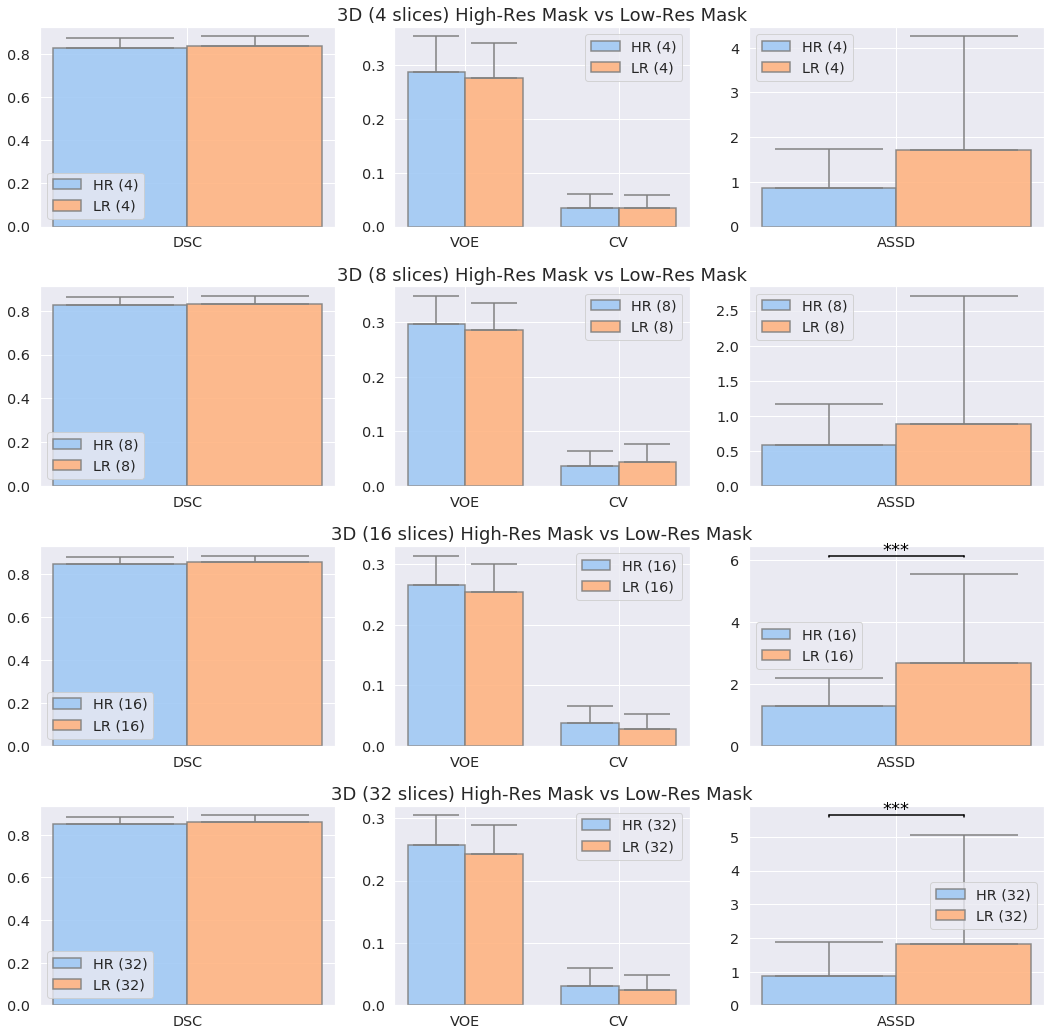

In [17]:
fig, axs = plt.subplots(len(exps.keys()), len(metrics), figsize=(18, 18))
#axs = axs.flatten()
for m_ind, m in enumerate(metrics):                      
    for exp_ind, num_slices in enumerate(sorted(exps_3d.keys())):
        ax = axs[exp_ind][m_ind]
        formatted_exp_labels = ['%s (%d)' % (x, num_slices) for x in exp_labels]
        pmats = stats.kruskal_dunn_analysis(exps[num_slices], formatted_exp_labels, metrics=m, suppress_output=True)
        autils.compare_metrics(exps[num_slices], formatted_exp_labels, metrics=m, p_sig_matrix=pmats, ax=ax, **bar_graph_kwargs)
        ax.legend(loc='best')
        if m_ind == len(metrics) // 2:
            ax.set_title('3D (%d slices) High-Res Mask vs Low-Res Mask' % num_slices)
plt.subplots_adjust(hspace=0.3)